In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [2]:
from sklearn.neural_network import MLPClassifier
#rede_neural = MLPClassifier(max_iter=1000, verbose = True, tol = 0.0001, hidden_layer_sizes = (2,2))
#rede_neural.fit(X_train,y_train)


In [3]:
dataset = pd.read_excel("Base_de_dados_IBP.xlsx",sheet_name = "classie") #Regressão,ensemble,pycaret
#dataset = litoral.drop('Município',axis=1)
array = dataset.values
X = array[:, 1:4].astype(float)
Y = array[:, 4]
Y

array(['A', 'D', 'A', 'A', 'C', 'C', 'A', 'A', 'C', 'B', 'C', 'C', 'A',
       'D', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'C', 'C',
       'A', 'A', 'C', 'A', 'B', 'D', 'C', 'A', 'C', 'D', 'A', 'A', 'B',
       'A', 'A', 'A', 'C', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'B', 'A',
       'D', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A',
       'A', 'C', 'A', 'B', 'D', 'C', 'D', 'B', 'A', 'A', 'A', 'A', 'A',
       'A', 'D', 'A', 'A', 'A', 'A', 'C', 'B', 'D', 'A', 'A', 'A', 'D',
       'A'], dtype=object)

In [4]:
# Separação em conjuntos de treino e teste

test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_size, random_state=seed)

In [5]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [6]:
# Criação dos modelos
models = []
#models.append(('LR', LogisticRegression(solver='newton-cg')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier(max_iter=1000, verbose = True, tol = 0.0001, hidden_layer_sizes = (2,2))))

In [7]:
np.random.seed(7) # definindo uma semente global

# Avaliação dos modelos
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.505357 (0.169229)
CART: 0.367857 (0.173352)
NB: 0.223214 (0.118518)
SVM: 0.558929 (0.231875)
Iteration 1, loss = 16.08102095
Iteration 2, loss = 16.08102094
Iteration 3, loss = 16.08102094
Iteration 4, loss = 16.08102093
Iteration 5, loss = 16.08102093
Iteration 6, loss = 16.08102093
Iteration 7, loss = 16.08102092
Iteration 8, loss = 16.08102092
Iteration 9, loss = 16.08102091
Iteration 10, loss = 16.08102091
Iteration 11, loss = 16.08102091
Iteration 12, loss = 16.08102090
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.01764662
Iteration 2, loss = 2.01634261
Iteration 3, loss = 2.01503755
Iteration 4, loss = 2.01373142
Iteration 5, loss = 2.01242422
Iteration 6, loss = 2.01111594
Iteration 7, loss = 2.00980656
Iteration 8, loss = 2.00849606
Iteration 9, loss = 2.00718444
Iteration 10, loss = 2.00587167
Iteration 11, loss = 2.00455774
Iteration 12, loss = 2.00324262
Iteration 13, loss = 2.00192631
Iteration 14, lo

C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 32.76696225
Iteration 2, loss = 32.76696225
Iteration 3, loss = 32.76696224
Iteration 4, loss = 32.76696224
Iteration 5, loss = 32.76696223
Iteration 6, loss = 32.76696222
Iteration 7, loss = 32.76696222
Iteration 8, loss = 32.76696221
Iteration 9, loss = 32.76696220
Iteration 10, loss = 32.76696220
Iteration 11, loss = 32.76696219
Iteration 12, loss = 32.76696219
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.53451062
Iteration 2, loss = 1.53374612
Iteration 3, loss = 1.53298221
Iteration 4, loss = 1.53221892
Iteration 5, loss = 1.53145625
Iteration 6, loss = 1.53069422
Iteration 7, loss = 1.52993283
Iteration 8, loss = 1.52917210
Iteration 9, loss = 1.52841203
Iteration 10, loss = 1.52765264
Iteration 11, loss = 1.52689394
Iteration 12, loss = 1.52613593
Iteration 13, loss = 1.52537863
Iteration 14, loss = 1.52462204
Iteration 15, loss = 1.52386618
Iteration 16, loss = 1.52311105
Iteration 17, loss =

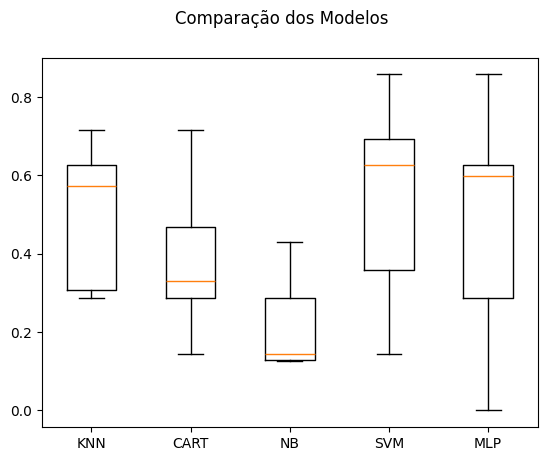

In [8]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [9]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledMLP', Pipeline([
    ('Scaler', StandardScaler()),
    ('MLP', MLPClassifier(max_iter=1000, verbose = True, tol = 0.0001, hidden_layer_sizes = (2,2)))])))
pipelines.append(('ScaledKNN', Pipeline([
    ('Scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([
    ('Scaler', StandardScaler()),
    ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([
    ('Scaler', StandardScaler()),
    ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([
    ('Scaler', StandardScaler()),
    ('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Iteration 1, loss = 1.67504074
Iteration 2, loss = 1.67381157
Iteration 3, loss = 1.67258411
Iteration 4, loss = 1.67135841
Iteration 5, loss = 1.67013449
Iteration 6, loss = 1.66891239
Iteration 7, loss = 1.66769216
Iteration 8, loss = 1.66647381
Iteration 9, loss = 1.66525739
Iteration 10, loss = 1.66404292
Iteration 11, loss = 1.66283042
Iteration 12, loss = 1.66161994
Iteration 13, loss = 1.66041149
Iteration 14, loss = 1.65920509
Iteration 15, loss = 1.65800078
Iteration 16, loss = 1.65679856
Iteration 17, loss = 1.65559846
Iteration 18, loss = 1.65440050
Iteration 19, loss = 1.65320468
Iteration 20, loss = 1.65201104
Iteration 21, loss = 1.65081957
Iteration 22, loss = 1.64963029
Iteration 23, loss = 1.64844320
Iteration 24, loss = 1.64725833
Iteration 25, loss = 1.64607566
Iteration 26, loss = 1.64489522
Iteration 27, loss = 1.64371700
Iteration 28, loss = 1.64254100
Iteration 29, loss = 1.64136724
Iteration 30, loss = 1.64019570
Iteration 31, loss = 1.63902639
Iteration 32, los

C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 616, loss = 1.23841908
Iteration 617, loss = 1.23818410
Iteration 618, loss = 1.23794969
Iteration 619, loss = 1.23771584
Iteration 620, loss = 1.23748255
Iteration 621, loss = 1.23724983
Iteration 622, loss = 1.23701766
Iteration 623, loss = 1.23678605
Iteration 624, loss = 1.23655499
Iteration 625, loss = 1.23632450
Iteration 626, loss = 1.23609456
Iteration 627, loss = 1.23586517
Iteration 628, loss = 1.23563634
Iteration 629, loss = 1.23540806
Iteration 630, loss = 1.23518033
Iteration 631, loss = 1.23495315
Iteration 632, loss = 1.23472652
Iteration 633, loss = 1.23450044
Iteration 634, loss = 1.23427491
Iteration 635, loss = 1.23404992
Iteration 636, loss = 1.23382548
Iteration 637, loss = 1.23360158
Iteration 638, loss = 1.23337822
Iteration 639, loss = 1.23315541
Iteration 640, loss = 1.23293314
Iteration 641, loss = 1.23271141
Iteration 642, loss = 1.23249021
Iteration 643, loss = 1.23226956
Iteration 644, loss = 1.23204944
Iteration 645, loss = 1.23182986
Iteration 

In [10]:
np.random.seed(7) # definindo uma semente global

# Tuning do KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(
    estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Melhor: %f usando %s" % 
    (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.558929 usando {'metric': 'euclidean', 'n_neighbors': 21}
0.439286 (0.172245): {'metric': 'euclidean', 'n_neighbors': 1}
0.419643 (0.216101): {'metric': 'euclidean', 'n_neighbors': 3}
0.489286 (0.205815): {'metric': 'euclidean', 'n_neighbors': 5}
0.503571 (0.227116): {'metric': 'euclidean', 'n_neighbors': 7}
0.478571 (0.189117): {'metric': 'euclidean', 'n_neighbors': 9}
0.489286 (0.217711): {'metric': 'euclidean', 'n_neighbors': 11}
0.478571 (0.226131): {'metric': 'euclidean', 'n_neighbors': 13}
0.519643 (0.248779): {'metric': 'euclidean', 'n_neighbors': 15}
0.533929 (0.230136): {'metric': 'euclidean', 'n_neighbors': 17}
0.533929 (0.230136): {'metric': 'euclidean', 'n_neighbors': 19}
0.558929 (0.231875): {'metric': 'euclidean', 'n_neighbors': 21}
0.467857 (0.168047): {'metric': 'manhattan', 'n_neighbors': 1}
0.382143 (0.194175): {'metric': 'manhattan', 'n_neighbors': 3}
0.489286 (0.250535): {'metric': 'manhattan', 'n_neighbors': 5}
0.476786 (0.170543): {'metric': 'manhattan', 

In [11]:
np.random.seed(7) # definindo uma semente global

# Tuning do SVM

c_values = [0.1, 0.5, 1.0, 1.5, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(
    estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Melhor: %f com %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.587500 com {'C': 1.0, 'kernel': 'sigmoid'}
0.558929 (0.231875): {'C': 0.1, 'kernel': 'linear'}
0.558929 (0.231875): {'C': 0.1, 'kernel': 'poly'}
0.558929 (0.231875): {'C': 0.1, 'kernel': 'rbf'}
0.558929 (0.231875): {'C': 0.1, 'kernel': 'sigmoid'}
0.558929 (0.231875): {'C': 0.5, 'kernel': 'linear'}
0.558929 (0.231875): {'C': 0.5, 'kernel': 'poly'}
0.558929 (0.231875): {'C': 0.5, 'kernel': 'rbf'}
0.558929 (0.231875): {'C': 0.5, 'kernel': 'sigmoid'}
0.558929 (0.231875): {'C': 1.0, 'kernel': 'linear'}
0.558929 (0.231875): {'C': 1.0, 'kernel': 'poly'}
0.558929 (0.231875): {'C': 1.0, 'kernel': 'rbf'}
0.587500 (0.203517): {'C': 1.0, 'kernel': 'sigmoid'}
0.558929 (0.231875): {'C': 1.5, 'kernel': 'linear'}
0.558929 (0.231875): {'C': 1.5, 'kernel': 'poly'}
0.558929 (0.231875): {'C': 1.5, 'kernel': 'rbf'}
0.573214 (0.218624): {'C': 1.5, 'kernel': 'sigmoid'}
0.558929 (0.231875): {'C': 2.0, 'kernel': 'linear'}
0.558929 (0.231875): {'C': 2.0, 'kernel': 'poly'}
0.558929 (0.231875): {'C': 2.

Iteration 1, loss = 31.59992034
Iteration 2, loss = 31.59992033
Iteration 3, loss = 31.59992032
Iteration 4, loss = 31.59992032
Iteration 5, loss = 31.59992031
Iteration 6, loss = 31.59992031
Iteration 7, loss = 31.59992030
Iteration 8, loss = 31.59992029
Iteration 9, loss = 31.59992029
Iteration 10, loss = 31.59992028
Iteration 11, loss = 31.59992028
Iteration 12, loss = 31.59992027
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy score =  0.10526315789473684


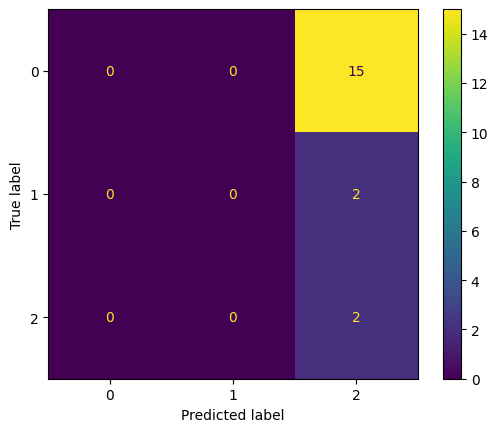

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        15
           C       0.00      0.00      0.00         2
           D       0.11      1.00      0.19         2

    accuracy                           0.11        19
   macro avg       0.04      0.33      0.06        19
weighted avg       0.01      0.11      0.02        19



C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
np.random.seed(7) # definindo uma semente global

# Preparação do modelo
#model = LogisticRegression(solver='newton-cg')
#model.fit(X_train, Y_train)
model = MLPClassifier(max_iter=1000, verbose = True, tol = 0.0001, hidden_layer_sizes = (2,2))
model.fit(X_train,Y_train)
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(Y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(Y_test, predictions)
#labels = ["A", "B", "C", "D"]
#cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(values_format="d")
plt.show()
#print(classification_report(Y_test, predictions, target_names=labels))
print(classification_report(Y_test, predictions))

Accuracy score =  0.7368421052631579


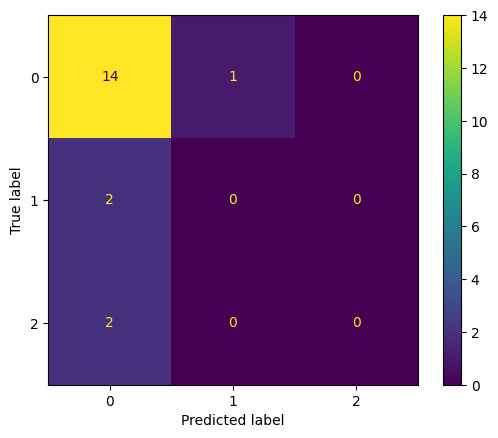

              precision    recall  f1-score   support

           A       0.78      0.93      0.85        15
           C       0.00      0.00      0.00         2
           D       0.00      0.00      0.00         2

    accuracy                           0.74        19
   macro avg       0.26      0.31      0.28        19
weighted avg       0.61      0.74      0.67        19



C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
np.random.seed(7) # definindo uma semente global

# Preparação do modelo
#model = LogisticRegression(solver='newton-cg')
#model.fit(X_train, Y_train)
model = SVC(C = 1.0,kernel='sigmoid')
model.fit(X_train,Y_train)
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(Y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(Y_test, predictions)
#labels = ["Sem diabetes", "Com diabetes"]
#cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(values_format="d")
plt.show()
#print(classification_report(Y_test, predictions, target_names=labels))
print(classification_report(Y_test, predictions))

Accuracy score =  0.7894736842105263


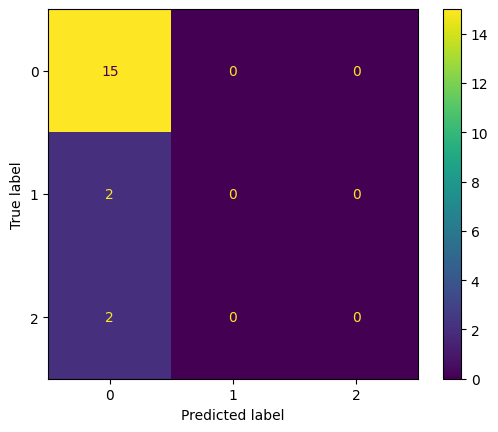

              precision    recall  f1-score   support

           A       0.79      1.00      0.88        15
           C       0.00      0.00      0.00         2
           D       0.00      0.00      0.00         2

    accuracy                           0.79        19
   macro avg       0.26      0.33      0.29        19
weighted avg       0.62      0.79      0.70        19



C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\projeto1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
np.random.seed(7) # definindo uma semente global

# Preparação do modelo
#model = LogisticRegression(solver='newton-cg')
#model.fit(X_train, Y_train)
model = KNeighborsClassifier(metric = 'euclidean', n_neighbors =21)
model.fit(X_train,Y_train)
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(Y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(Y_test, predictions)
#labels = ["Sem diabetes", "Com diabetes"]
#cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(values_format="d")
plt.show()
#print(classification_report(Y_test, predictions, target_names=labels))
print(classification_report(Y_test, predictions))

In [16]:
# multi-class classification with Keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# load dataset
dataset = pd.read_excel("Base_de_dados_IBP.xlsx",sheet_name = "classie") #Regressão,ensemble,pycaret
#dataset = litoral.drop('Município',axis=1)
array = dataset.values

X = array[:, 1:4].astype(float)
Y = array[:, 4]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
scaler=StandardScaler()
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
def baseline_model():
    model = Sequential()
    model.add(Dense(128, input_dim=3, activation='relu'))
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(4, activation='softmax'))
 # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train_scaled, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\USER\AppData\Local\Temp\ipykernel_9488\3417793941.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


Baseline: 45.71% (19.43%)


In [31]:
#print(estimator.fit(X_train_scaled,y_train))
predictions = estimator.predict(X_test_scaled)
print(predictions)

1/1 [==============================] - 0s 25ms/step
[0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0]


In [29]:
y_test

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

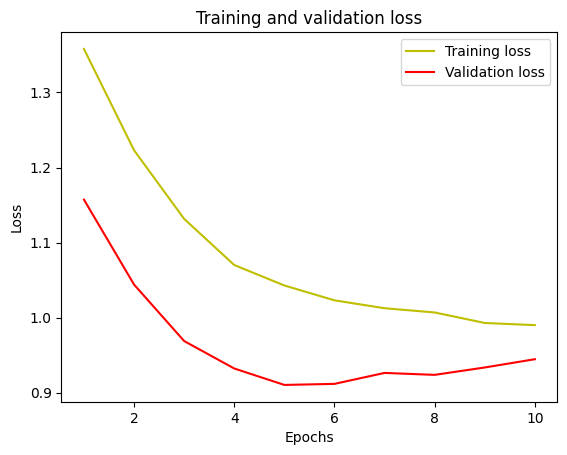

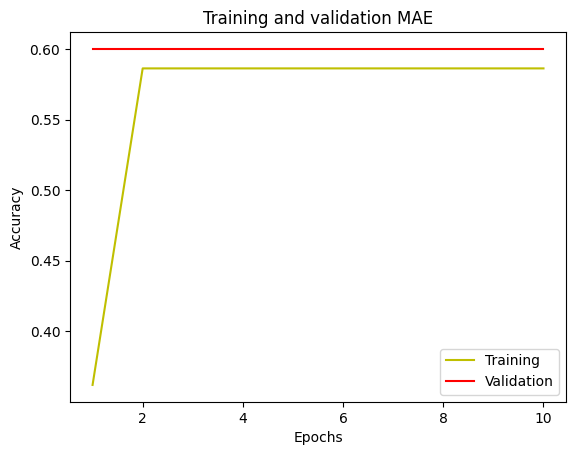

In [20]:
history = estimator.fit(X_train_scaled, y_train, validation_split=0.2, epochs =10)

from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()